<a href="https://colab.research.google.com/github/LucilleKaleha/Determining-Hypothyroidism-in-a-Patient/blob/master/W8_IP_Hypothyroid_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question


  This week's project requires us to build a model that determines whether or not the patient's symptoms indicate that
  the patient has hypothyroid

## Metric of Success

Building models (both decision trees and svm) with an accuracy of at least 85%

## Context

Hypothyroidism is a condition where the thyroid gland is underactive and doesn’t produce enough thyroid hormone

## Experimental Design

## Data

Nairobi Hospital conducted a clinical camp to test for hypothyroidism and data collected focused on Thyroid patients.

The data for this project was sourced from http://bit.ly/hypothyroid_data

### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns ; sns.set(font_scale = 1.3)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# we will import the other necessary libraries as we move along

### Loading and Previewing Dataset

In [2]:
# Creating a dataframe that we will work with from the provided dataset

hyp = pd.read_csv('/content/hypothyroid.csv')
hyp.head()      # Previewing the first rows in the dataset

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# Checking the data types

hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [4]:
# Checking the unique values in the columns

values ={}
for i in hyp.columns:
    values[i] =(hyp[i].unique())
values

{'FTI': array(['10', '17', '0', '6', '44', '23', '63', '32', '7.50', '61', '41',
        '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
        '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
        '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
        '20', '1.40', '56', '3', '51', '13', '43', '78', '52', '64', '26',
        '35', '31', '133', '3.40', '54', '8.90', '57', '5.50', '58', '55',
        '2.80', '66', '4', '40', '50', '8.70', '87', '89', '112', '123',
        '99', '92', '104', '69', '196', '107', '106', '74', '97', '?',
        '122', '84', '114', '124', '241', '119', '120', '136', '85', '127',
        '839', '137', '197', '96', '77', '108', '82', '72', '94', '91',
        '240', '121', '109', '79', '100', '98', '73', '117', '165', '103',
        '88', '101', '126', '132', '128', '143', '152', '141', '186',
        '113', '102', '125', '93', '105', '159', '188', '71', '149', '116',
        '83', '176', '161', '86', '1

Our dataframe appears to have a number of '?' characters! We cannot change the column data types before 

removing this character. We therefore need to carry out a bit of data cleaning at this stage before moving to EDA

### Data Cleaning

In [0]:
# We'll start with replacing the '?' character in the dataframe

hyp = hyp.replace('?', np.nan)

In [6]:
# One of the columns we identified this character was TBG
# Lets preview the unique values in this column to see whether our rplace action worked

hyp.TBG.unique()

array([nan, '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [7]:
# We can now change the column data types
# We can use a simple for loop for this

numerics = hyp[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'age']].columns

for x in hyp.columns:
  if x in numerics:
    hyp[x] = pd.to_numeric(hyp[x], errors = 'coerce')
  else:
    hyp[x] = hyp[x].astype('category')
  
hyp.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

## Exploratory Data Analysis

In [8]:
# We can speed up our EDA process a little using pandas profiling
import pandas_profiling as pp

pp.ProfileReport(hyp)

Number of variables,26
Number of observations,3163
Total Missing (%),2.9%
Total size in memory,233.5 KiB
Average record size in memory,75.6 B
Numeric,6
Categorical,19
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [9]:
# From our initial overview, the TBG column appeared to have a very high a number
# of missing values
# We can check to confirm this, and compare it to the shape of our dataframe
# 
print(hyp.shape)
print('\n')
print(hyp.TBG.isnull().sum())

(3163, 26)


2903


In [10]:
# The overview on pandas profiling indicated that there are 77 duplicated rows in our 
# dataframe, let's drop these rows

# len(hyp[hyp.duplicated()])
hyp = hyp.drop_duplicates()
hyp.duplicated().sum()

0

In [11]:
# We are going to drop the TBG column because;
# i) it has a very high number of null values(92%) of the rows and,
# ii) from our overview, it is highly correlated with T4U

hyp = hyp.drop('TBG', axis = 1)
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


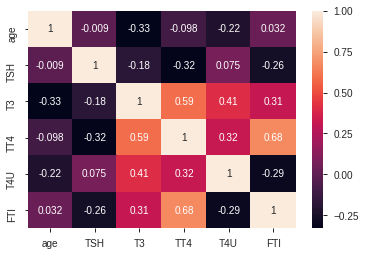

In [15]:
# Let's look at the correlation between the numerical variables in our dataset
correlation = hyp.corr()

%matplotlib inline
sns.heatmap(correlation, annot = True)


In [16]:
hyp.isnull().any()

status                       False
age                           True
sex                           True
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                           True
T3_measured                  False
T3                            True
TT4_measured                 False
TT4                           True
T4U_measured                 False
T4U                           True
FTI_measured                 False
FTI                           True
TBG_measured                 False
dtype: bool

In [17]:
# Filling the null values in the dataframe, starting with the categorical column sex

# calculating the mode, this will show us the sex that was mos likely to be interviewed
# for the study, and we will use this to fill the null entries

md = hyp['sex'].mode() 
print(md)

hyp['sex'].fillna(value = 'F', inplace=True)
hyp.sex.unique()


0    F
Name: sex, dtype: category
Categories (2, object): [F, M]


[M, F]
Categories (2, object): [M, F]

In [18]:
#   calculating the mode of the column age, by first grouping those with status hypothyroid
# and those that are negative
# 
  hyp.groupby('status').age.apply(lambda x: x.value_counts())

status           
hypothyroid  72.0     8
             50.0     8
             65.0     7
             62.0     6
             43.0     5
             60.0     5
             24.0     4
             85.0     4
             69.0     4
             53.0     4
             34.0     4
             27.0     4
             73.0     3
             77.0     3
             42.0     3
             68.0     3
             79.0     3
             28.0     3
             63.0     3
             58.0     2
             15.0     2
             75.0     2
             59.0     2
             78.0     2
             44.0     2
             40.0     2
             48.0     2
             71.0     2
             41.0     2
             35.0     2
                     ..
negative     18.0    21
             19.0    20
             84.0    20
             17.0    17
             85.0    17
             16.0    16
             15.0    15
             82.0    14
             86.0    10
             87.0    1

In [0]:
# in order to deal with the null values in the age column, we create a function that checks 
# whether the patient status is hypothyroid or negative then returns the mode value we 
# calculated above

def age_approx(cols):
    age = cols[0]
    status = cols[1]
    
    if pd.isnull(age):
        if status == 'hypothyroid':
            return 50
        else:
            return 18
    else:
        return age
      
hyp['age'] = hyp[['age', 'status']].apply(age_approx, axis = 1)

In [20]:
# Let's confirm to check i there are any null values in the column

hyp.age.isnull().any()

False

First of all, let us acknowledge that the null values were for the tests that were 
not measured i.e. where 'TSH measured' for example was not measured, the corresponding
TSH value was ? (which we replaced with np.nan) and this was similar for all the ? values.
Therefore, instead of assuming a value of 0 for these null values (considering we do not 
fully understand the implication of a 0 measure), we will replace these null entries with the mean 
of that group

In [21]:
# Getting the mean of the numerical columns
# We'll calculate the means by grouping those with hypothyroid and without
# We don't want to include TBG in the following analysis, so first we'll create a
# list of the numerical columns we are interested in

nums = hyp[['TSH', 'T3', 'TT4', 'T4U', 'FTI']].columns

for column in nums:
  print('\n')
  print(column + ': ' + str(hyp.groupby('status').mean()))



TSH:                    age        TSH        T3        TT4       T4U         FTI
status                                                                      
hypothyroid  53.439716  65.653571  1.126562   35.11773  1.061915   33.240426
negative     46.239389   2.445933  1.979017  112.54281  0.973163  119.773181


T3:                    age        TSH        T3        TT4       T4U         FTI
status                                                                      
hypothyroid  53.439716  65.653571  1.126562   35.11773  1.061915   33.240426
negative     46.239389   2.445933  1.979017  112.54281  0.973163  119.773181


TT4:                    age        TSH        T3        TT4       T4U         FTI
status                                                                      
hypothyroid  53.439716  65.653571  1.126562   35.11773  1.061915   33.240426
negative     46.239389   2.445933  1.979017  112.54281  0.973163  119.773181


T4U:                    age        TSH        T3      

In [22]:
# Getting median for the numerical columns
# We are going to use the same for loop as above

for column in nums:
  print('\n')
  print(column + ': ' + str(hyp.groupby('status').median()))



TSH:               age   TSH   T3    TT4   T4U    FTI
status                                          
hypothyroid  51.0  38.5  0.9   33.0  1.04   34.0
negative     47.0   0.6  1.9  105.0  0.96  109.0


T3:               age   TSH   T3    TT4   T4U    FTI
status                                          
hypothyroid  51.0  38.5  0.9   33.0  1.04   34.0
negative     47.0   0.6  1.9  105.0  0.96  109.0


TT4:               age   TSH   T3    TT4   T4U    FTI
status                                          
hypothyroid  51.0  38.5  0.9   33.0  1.04   34.0
negative     47.0   0.6  1.9  105.0  0.96  109.0


T4U:               age   TSH   T3    TT4   T4U    FTI
status                                          
hypothyroid  51.0  38.5  0.9   33.0  1.04   34.0
negative     47.0   0.6  1.9  105.0  0.96  109.0


FTI:               age   TSH   T3    TT4   T4U    FTI
status                                          
hypothyroid  51.0  38.5  0.9   33.0  1.04   34.0
negative     47.0   0.6  1.9  105.0

In [0]:
# It would make sense for our case, to use the median values over the mean values
# Let's first create a dictionary with the above information on median, to make it easier access
# We'll then use this to fill our null values
unit = ['TSH','T3','TT4','T4U','FTI']

hypothyroid =  {    
    'TSH': 36.0,
    'T3': 0.9,
    'TT4': 33.0,
    'T4U': 1.03,
    'FTI': 34.0
}

negative = {
    'TSH': 0.6,
    'T3': 1.9,
    'TT4': 106.0, 
    'T4U': 0.96,
    'FTI': 109.0
}
hyp[unit] = hyp[unit].fillna(hypothyroid)
hyp[unit] = hyp[unit].fillna(negative)

In [28]:
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

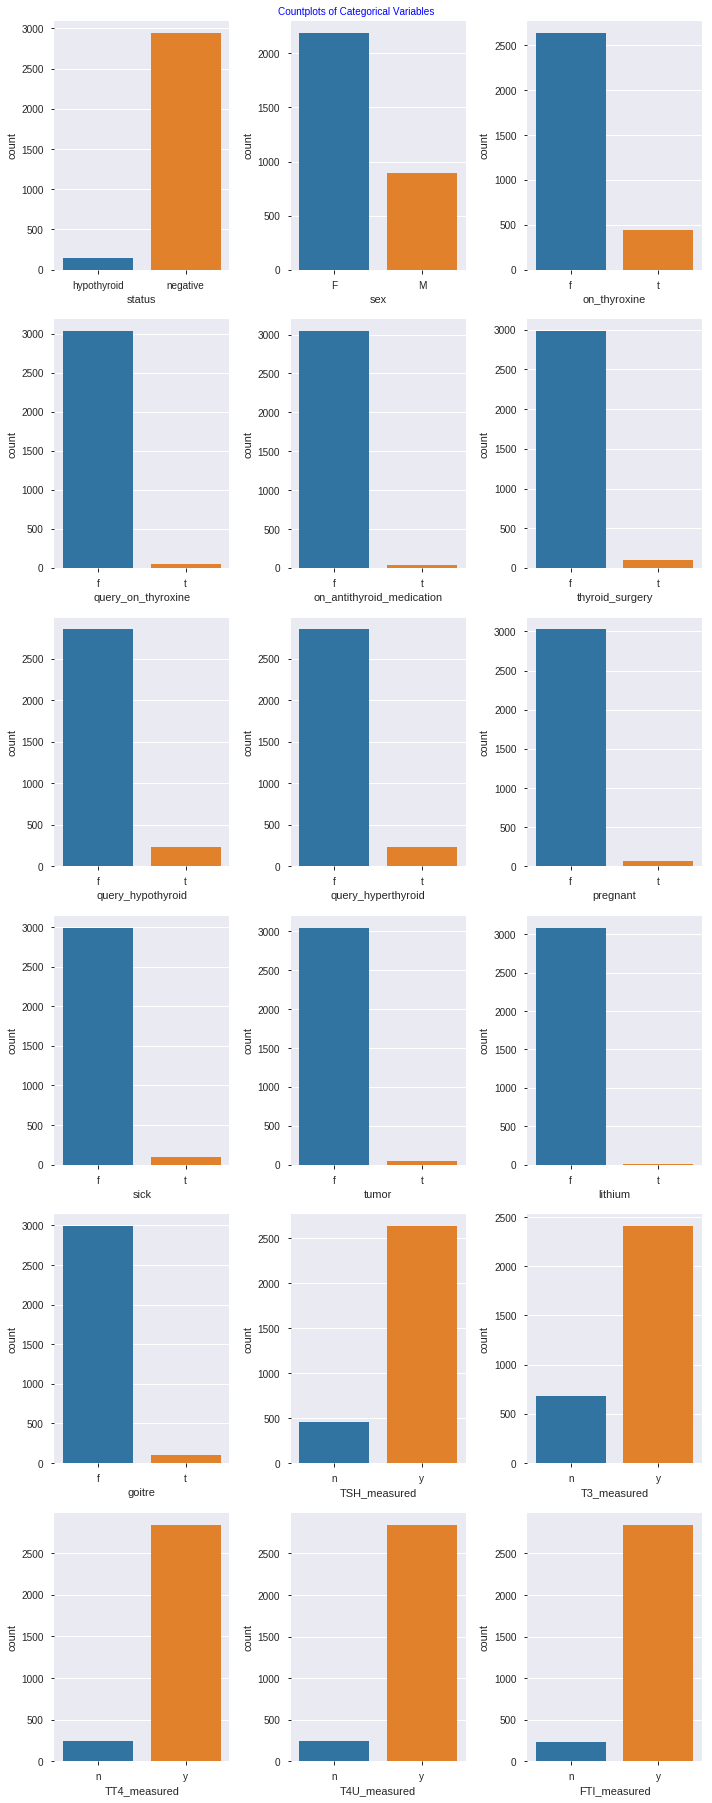

In [31]:
# Let's do a bit of visualizations now to see the relationships between our variables
# We can start with a count plot
# 
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset
categorics = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 
              'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor',
              'lithium', 'goitre', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10,25))
plt.suptitle('Countplots of Categorical Variables', fontsize = 10, y = 1.0, color = 'blue')

for ax, data, column in zip(axes.flatten(), hyp, categorics):
    sns.countplot(hyp[column], ax=ax)
    
plt.tight_layout()

From the above figure, we can see that our dataset is quite imbalanced with most

of the data points being about those who tested negative for hypothyroidism

In [0]:
# Let's do the same for the numerical columns sing scatter plots
# 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,25))
plt.suptitle('plots of numerical variables', fontsize = 20, y = 0.92, color = 'blue')
for ax, data, nums in zip(axes.flatten(), hyp, nums):
    sns.boxplot(hyp['status'],hyp[nums], ax=ax)
    
plt.tight_layout()

From the above plots it appears that the TSH measurement is the most sensitive 

test for showing individuals with thyroid hormone abnormalities.

## Part 1: Decision trees:

In [0]:
# Importing the necessary libraries for this next step
from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

### Random Forests

In [46]:
# Separating the target variable from our dataset
X = hyp.drop(['status', 'TBG_measured'],axis = 1)   #Since we dropped the TBG column, we will not need its measure
X = pd.get_dummies(X)
y = hyp['status']
#
# Then, split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify = y)
# 
# Building the model
fr = RandomForestClassifier()
# Training using the train set
fr = fr.fit(X_train, y_train)
#
# Predict the response for X
y_pred_fr = fr.predict(X)
# 
print(accuracy_score(y, y_pred_fr))   #THis will check the accuracy of the model
confusion_matrix(y, y_pred_fr)  # This will further evaluate our prediction

0.9980557355800389


array([[ 136,    5],
       [   1, 2944]])

In [47]:
# Lets see how the classification report looks like
clas = classification_report(y, y_pred_fr)
print(clas)

              precision    recall  f1-score   support

 hypothyroid       0.99      0.96      0.98       141
    negative       1.00      1.00      1.00      2945

    accuracy                           1.00      3086
   macro avg       1.00      0.98      0.99      3086
weighted avg       1.00      1.00      1.00      3086



In [48]:
# Lets see which parameteres our Random Forest Classifier model used

fr.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Gradient Boosted Trees

In [49]:
# The above accuracy seems pretty good, but let's apply gradient boosting and
# see if we can improve this score
grad = GradientBoostingClassifier()
grad.fit(X_train, y_train)
# 
y_pred_gr = grad.predict(X)
# 
print(accuracy_score(y, y_pred_gr))
confusion_matrix(y, y_pred_gr) 

0.9974076474400518


array([[ 135,    6],
       [   2, 2943]])

In [50]:
grad.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Our random forest classifier was able to predict with a higher accuracy compared to

gradient boosting classifier

Text(0.5, 1.0, 'Variable Importances')

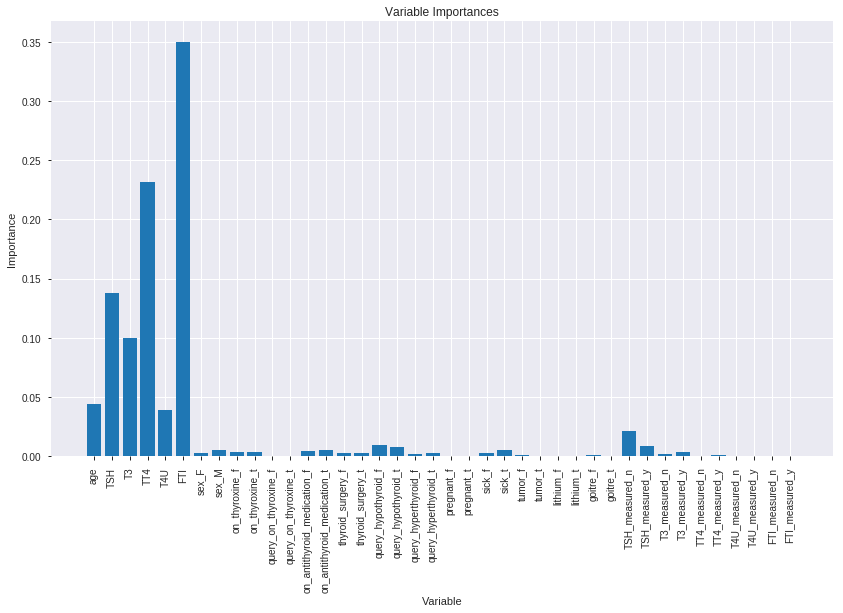

In [56]:
# Getting feature importance for gradient boosting and visualizing them in a bar chart

# pd.DataFrame({'feature':X.columns, 'importance': grad.feature_importances_}).sort_values(by = 'importance', ascending = False).set_index('feature').plot(kind='bar')
# plt.figure(figsize = (14,8))
# plt.show()

# Get numerical feature importances
test_features = X.columns.to_list()
importances = fr.feature_importances_.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
# We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.figure(figsize=(14, 8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [57]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: FTI                  Importance: 0.35
Variable: TT4                  Importance: 0.23
Variable: TSH                  Importance: 0.14
Variable: T3                   Importance: 0.1
Variable: age                  Importance: 0.04
Variable: T4U                  Importance: 0.04
Variable: TSH_measured_n       Importance: 0.02
Variable: on_antithyroid_medication_t Importance: 0.01
Variable: query_hypothyroid_f  Importance: 0.01
Variable: query_hypothyroid_t  Importance: 0.01
Variable: sick_t               Importance: 0.01
Variable: TSH_measured_y       Importance: 0.01
Variable: sex_F                Importance: 0.0
Variable: sex_M                Importance: 0.0
Variable: on_thyroxine_f       Importance: 0.0
Variable: on_thyroxine_t       Importance: 0.0
Variable: query_on_thyroxine_f Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: on_antithyroid_medication_f Importance: 0.0
Variable: thyroid_surgery_f    Importance: 0.0
Variable: thyroid_surgery_t    Impo

## Part 2: Support Vector Machine:

The most important features as shown on the gradient boodting section were TSH, FTI and TT4

These are the features we are going to use for SVM

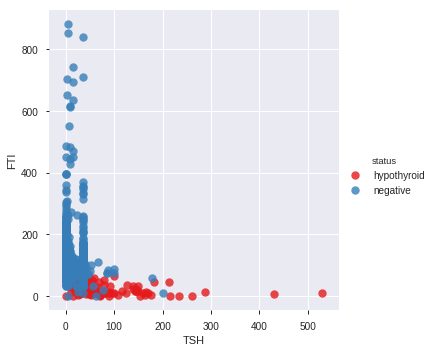

In [59]:
# We are going to use TSH and FTI as our classifying criteria. So we plot the two 
# columns to see if we can apply svm on them
# 
sns.lmplot('TSH', 'FTI', data=hyp, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

From the graph we two classes, hyperthyroid indicated by red dots and negative representated by the blue dots. let's see if we can use svm to train a model that will be able to classify the status as either hypothyroid or negative

In [113]:
# By simply looking at the graph, we can't tell which SVC kernel will perform the best
# We can find out
X = hyp[['TSH', 'FTI']]
y = hyp.status
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 
# First, we create a list of SVC algorithms with different kernels.
# 

models = []
models.append(('Polynomial', SVC(kernel='poly') ))
models.append(('Radial Basis Function', SVC(kernel='rbf')))
models.append(('Linear', SVC(kernel='linear')))
models.append(('Sigmoid', SVC(kernel='sigmoid')))

# then we can evaluate each algorithm in turn

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=3, random_state=0)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Polynormial: 0.973123 (0.001468)
Radial Basis Function: 0.957312 (0.005811)
Linear: 0.977869 (0.005318)
Sigmoid: 0.951779 (0.005333)


Polynormial: 0.973123 (0.001468)
Radial Basis Function: 0.957312 (0.005811)
Linear: 0.977869 (0.005318)
Sigmoid: 0.951779 (0.005333)

### Using Linear Kernel

In [60]:
# The SVC with the linear kernel model is the best performing with 0.977869
# Fit the model
model = SVC(kernel= 'linear')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X)
# 
print(accuracy_score(y, y_pred))
confusion_matrix(y, y_pred) 

0.9863901490602722


array([[ 108,   33],
       [   9, 2936]])

In [61]:
# Lets apply this on our whole dataframe
X = hyp.drop(['status', 'TBG_measured'],axis = 1)
X = pd.get_dummies(X)
y = hyp['status']
# 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify = y)
# 
md = SVC(kernel= 'linear')
md = md.fit(X_train, y_train)
# 
y_pred_md = md.predict(X)
# 
print(accuracy_score(y, y_pred_md))
confusion_matrix(y, y_pred_md)

0.9863901490602722


array([[ 108,   33],
       [   9, 2936]])

### Using RBF kernel

In [62]:
# Fit the model
model = SVC(kernel= 'rbf')
model.fit(X_train, y_train)

# Prediction
y_pred_r = model.predict(X)
# 
print(accuracy_score(y, y_pred_r))
confusion_matrix(y, y_pred_r)

0.9880103694102398


array([[ 104,   37],
       [   0, 2945]])

In [63]:
# Lets apply this on our whole dataframe
X = hyp.drop(['status', 'TBG_measured'],axis = 1)
X = pd.get_dummies(X)
y = hyp['status']
# 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify = y)
# 
m = SVC(kernel= 'rbf')
m = m.fit(X_train, y_train)
# 
y_pred_m = m.predict(X)
# 
print(accuracy_score(y, y_pred_m))
confusion_matrix(y, y_pred_m)

0.9880103694102398


array([[ 104,   37],
       [   0, 2945]])

RBF has performed better than the linear kernel despite having a lower accuracy

mean on our initial algorthm performance

## Challenging the solution

All the models we ran gave us pretty good results!

There's is the issue however of lacking in domain knowledge! Despite all the research conducted
and the exploratory data analysis carried out on this dataset, we still do not completely
understand how and why these variables affect each other! This might also owe to the fact 
that we did not have a data dictionary

My conclusion would therefore be that, in order to build a more accurate(or rather better
informed model), we would need to get a clearer understaning of the variables we are working with!

We can then ask ourselves whether the data we have is enough and whether the features we have 
correctly inform our target variable.